# Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

# Data collection

***Data import***

In [44]:
data = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv').drop('Unnamed: 0',axis=1)

In [45]:
data.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


***Columns description***

In [46]:
data.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime'],
      dtype='object')

In [47]:
data.shape

(16744, 16)

| Variable        | Definition                                | Key           |
|-----------------|-------------------------------------------|---------------|
| ID              | Unique movie ID                           |               |
| Title           | Title of the movie                        |               |
| Year            | Year when the movie was produced          |               |
| Age             | Target age group                          |               |
| IMDb            | IMDb rating                               |               |
| Rotten Tomatoes | Rotten Tomatoes %                         |               |
| Netflix         | Whether the movie is found on Netflix     | 1: Yes, 0: No |
| Hulu            | Whether the movie is found on Hulu        | 1: Yes, 0: No |
| Prime Video     | Whether the movie is found on Prime Video | 1: Yes, 0: No |
| Disney+         | Whether the movie is found on Disney+     | 1: Yes, 0: No |
| Type            | Movie or TV series                        |               |
| Directors       | Directors of the movie                    |               |
| Genres          | Genres of the movie                       |               |
| Country         | Country where the movie was produced      |               |
| Language        | Languages available for the movie         |               |
| Runtime         | Length of the movie                       |               |

# Data cleaning

***Describe the data***

In [48]:
data.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


***Check for null values***

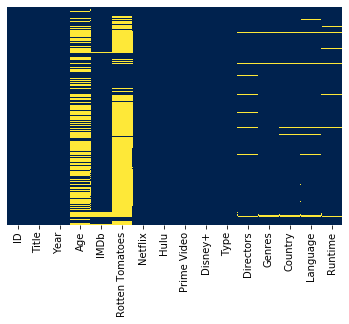

In [49]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

This dataset is quite large with more than 16k entries. The objective here is to perform EDA and find interesting insights. I might also try later to predict the rating of a movie. If we decide to drop some rows with missing values, it won't have too much impact on the outcomes. Let's have a look at the 'Age' and 'Rotten Tomatoes' features as they seem to have a lot of missing values.

In [50]:
print("{0:.0%}".format(data['Age'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'Age' feature.")

56% of missing values in the 'Age' feature.


In [51]:
print("{0:.0%}".format(data['Rotten Tomatoes'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'Rotten Tomatoes' feature.")

69% of missing values in the 'Rotten Tomatoes' feature.


In [52]:
print("{0:.0%}".format(data['IMDb'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'IMDb' feature.")

3% of missing values in the 'IMDb' feature.


I will remove the 'Age' feature but I might come back to it later as there is still some insightful data available. I will drop the 'Rotten Tomatoes' feature as the 'IMDb' one can do the job for the prediction (only 3% of missing values). I will also drop the few rows on which we are missing some information like 'Directors', 'Genres' etc.

In [53]:
data_clean = data.drop(['Rotten Tomatoes','Age'],axis=1)

In [55]:
data_clean.dropna(inplace=True)

In [56]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


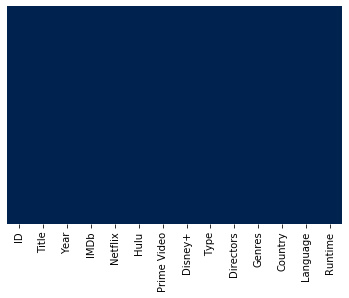

In [58]:
sns.heatmap(data_clean.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [64]:
print("We lost","{0:.0%}".format((data_clean.shape[0]-data.shape[0])/data.shape[0]),"of the initial dataset by removing null values.")

We lost -9% of the initial dataset by removing null values.


I believe this is ok, we can move forward with our cleaning.

In [65]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [66]:
data_clean['Type'].value_counts()

0    15233
Name: Type, dtype: int64

I noticed that the 'Type' feature should contain 1s and 0s to detect movies and TV series. Here this is not the case. I guess there is an issue with the dataset here. We will then remove this column.

In [67]:
data_clean.drop('Type',axis=1,inplace=True)

In [68]:
data_clean.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
